In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
%config IPCompleter.greedy=True

In [4]:
ttt = pd.read_csv('tic_tac_toe.txt', names=['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'Class'])
ttt.replace(['negative', 'positive'], [0, 1], inplace=True)
ttt.replace(['b', 'o', 'x'], [2, 0, 1], inplace=True)
ttt

,TL,TM,TR,ML,MM,MR,BL,BM,BR,Class
0,1,1,1,1,0,0,1,0,0,1
1,1,1,1,1,0,0,0,1,0,1
2,1,1,1,1,0,0,0,0,1,1
3,1,1,1,1,0,0,0,2,2,1
4,1,1,1,1,0,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
953,0,1,1,1,0,0,0,1,1,0
954,0,1,0,1,1,0,1,0,1,0
955,0,1,0,1,0,1,1,0,1,0
956,0,1,0,0,1,1,1,0,1,0


In [5]:
ttt_categorical = pd.read_csv('tic_tac_toe.txt', 
                              names=['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'Class']) \
                    .replace({'negative': 0, 'positive': 1})
ttt_categorical = pd.get_dummies(ttt_categorical)
ttt_categorical = ttt_categorical.drop(ttt_categorical.filter(regex='_b'), axis=1)
ttt_categorical

,Class,TL_o,TL_x,TM_o,TM_x,TR_o,TR_x,ML_o,ML_x,MM_o,MM_x,MR_o,MR_x,BL_o,BL_x,BM_o,BM_x,BR_o,BR_x
0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0
1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0
2,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1
3,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0
4,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1
954,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1
955,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1
956,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1


In [7]:
spam = pd.read_csv('spam.csv', index_col=0)
spam.replace(['nonspam', 'spam'], [0, 1], inplace=True)
spam

,make,address,all,num3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,num000,money,hp,hpl,george,num650,lab,labs,telnet,num857,data,num415,num85,technology,num1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4599,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4600,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [8]:
ttt_X = ttt.drop('Class', axis=1)
ttt_y = ttt.Class
ttt_categorical_X = ttt_categorical.drop('Class', axis=1)
ttt_categorical_y = ttt_categorical.Class
spam_X = spam.drop('type', axis=1)
spam_y = spam.type

In [9]:
gnb = GaussianNB()
ttt_scores_data = pd.DataFrame()
ttt_categorical_scores_data = pd.DataFrame()
spam_scores_data = pd.DataFrame()
for test_size in np.arange(0.01, 1, 0.02):
    ttt_X_train, ttt_X_test, ttt_y_train, ttt_y_test = train_test_split(ttt_X, ttt_y, test_size=test_size, random_state=0)
    ttt_categorical_X_train, ttt_categorical_X_test, ttt_categorical_y_train, ttt_categorical_y_test = \
        train_test_split(ttt_categorical_X, ttt_categorical_y, test_size=test_size, random_state=0)
    spam_X_train, spam_X_test, spam_y_train, spam_y_test = train_test_split(spam_X, spam_y, test_size=test_size, random_state=0)
    
    gnb.fit(ttt_X_train, ttt_y_train)
    train_score = gnb.score(ttt_X_train, ttt_y_train)
    test_score = gnb.score(ttt_X_test, ttt_y_test)
    temp_scores_data = pd.DataFrame(index=[test_size], 
                                    data={'train_score': [train_score], 
                                          'test_score': [test_score]})
    ttt_scores_data = ttt_scores_data.append(temp_scores_data)
    
    gnb.fit(ttt_categorical_X_train, ttt_categorical_y_train)
    train_score = gnb.score(ttt_categorical_X_train, ttt_categorical_y_train)
    test_score = gnb.score(ttt_categorical_X_test, ttt_categorical_y_test)
    temp_scores_data = pd.DataFrame(index=[test_size], 
                                    data={'train_score': [train_score], 
                                          'test_score': [test_score]})
    ttt_categorical_scores_data = ttt_categorical_scores_data.append(temp_scores_data)
    
    gnb.fit(spam_X_train, spam_y_train)
    train_score = gnb.score(spam_X_train, spam_y_train)
    test_score = gnb.score(spam_X_test, spam_y_test)
    temp_scores_data = pd.DataFrame(index=[test_size], 
                                    data={'train_score': [train_score], 
                                          'test_score': [test_score]})
    spam_scores_data = spam_scores_data.append(temp_scores_data)

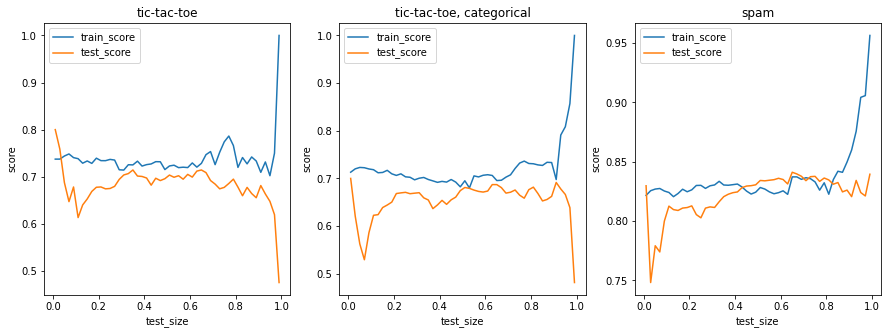

In [18]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].set(xlabel='test_size', ylabel='score')
ax[1].set(xlabel='test_size', ylabel='score')
ax[2].set(xlabel='test_size', ylabel='score')
ttt_scores_data.plot(ax=ax[0], title='tic-tac-toe')
ttt_categorical_scores_data.plot(ax=ax[1], title='tic-tac-toe, categorical')
_ = spam_scores_data.plot(ax=ax[2], title='spam')